In [1]:
import os
import pathlib
import pandas as pd
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

In [2]:
!pip install ktrain
import ktrain
from ktrain import text
MODEL_NAME="Musixmatch/umberto-wikipedia-uncased-v1"

     |████████████████████████████████| 25.3 MB 804 kB/s eta 0:00:01
     |████████████████████████████████| 981 kB 50.0 MB/s eta 0:00:01
     |████████████████████████████████| 263 kB 52.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 26.0 MB/s eta 0:00:01
     |████████████████████████████████| 468 kB 56.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 60.6 MB/s eta 0:00:01
  Created wheel for ktrain: filename=ktrain-0.27.3-py3-none-any.whl size=25283131 sha256=2ec71a79cc258d18d322fafc71cf3fd93236da55f565cc56b6b9b8c95055424a
  Stored in directory: /root/.cache/pip/wheels/3c/ef/e1/7da805d8a5944e8a3ac0553831d832c00b1800b848939849cb
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=f2da5179bf6912aa44f7b1d6a53897f8324028c097f4b28b28264472cd9d4de1
  Stored in directory: /root/.cache/pip/wheels/f5/ac/f1/4e13d7aff05c722d142b7d20a88ad63f9aab11b895411241a4
  Created wheel for keras-bert: filename=keras_bert-0.88.0-py3-non

2021-09-30 10:29:03.885830: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [3]:
train_path= "../input/dati-di-training-e-di-test/haspeede2_dev_taskAB.csv"
test_path="../input/dati-di-training-e-di-test/haspeede2_reference_taskAB-tweets.csv"
tr_path=pathlib.Path(train_path)
te_path=pathlib.Path(test_path)
if tr_path.exists():
    print("Train data path set.")
else:
    raise SystemExit("Training Data Path does not exist.")

if te_path.exists():
    print("Test data path set.")
else:
    raise SystemExit("Test Data Path does not exist.")

Train data path set.
Test data path set.


In [4]:
train_df= pd.read_csv(train_path, encoding='utf-8', sep="\t", header=None)
train_df=train_df.drop([0])
train_df.head()

,0,1,2,3
1,2066,"È terrorismo anche questo, per mettere in uno ...",0,0
2,2045,@user @user infatti finché ci hanno guadagnato...,0,0
3,61,"Corriere: Tangenti, Mafia Capitale dimenticata...",0,0
4,1259,"@user ad uno ad uno, perché quando i migranti ...",0,0
5,949,Il divertimento del giorno? Trovare i patrioti...,0,0


In [5]:
test_df= pd.read_csv(test_path, encoding='utf-8', sep="\t",header=None)
test_df.head()

,0,1,2,3
0,11834,@user A me pare una scelta politica suicida pu...,1,0
1,12113,@user e' un perfetto musulmano!!! chi dice il ...,1,1
2,11770,Mai Tg e i giornaloni hanno parlato di questa ...,1,1
3,11937,@user Ipocriti farabutti. Fanno morire i terre...,1,1
4,11870,@user @user @user L'IMMIGRAZIONE C'E' STATO UN...,1,1


In [6]:
x_train=train_df[1].tolist()
y_train=train_df[2].tolist()
x_test=test_df[1].tolist()
y_test=test_df[2].tolist()


t=text.Transformer(MODEL_NAME,maxlen=100)
trn=t.preprocess_train(x_train,y_train)
val=t.preprocess_test(x_test,y_test)

Downloading:   0%|          | 0.00/508 [00:00<?, ?B/s]

preprocessing train...
language: it
train sequence lengths:
	mean : 23
	95percentile : 45
	99percentile : 50


Downloading:   0%|          | 0.00/801k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.02M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/210 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/309 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: it
test sequence lengths:
	mean : 35
	95percentile : 49
	99percentile : 53


404 Client Error: Not Found for url: https://huggingface.co/Musixmatch/umberto-wikipedia-uncased-v1/resolve/main/tf_model.h5
/opt/conda/lib/python3.7/site-packages/ktrain/text/preprocessor.py:1067: UserWarning: Could not find Tensorflow version of model.  Attempting to download/load PyTorch version as TensorFlow model using from_pt=True. You will need PyTorch installed for this.
  warnings.warn('Could not find Tensorflow version of model.  Attempting to download/load PyTorch version as TensorFlow model using from_pt=True. ' +\


Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

2021-09-30 10:29:35.816692: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-30 10:29:35.818754: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-30 10:29:35.864792: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-30 10:29:35.865504: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-09-30 10:29:35.865571: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-09-30 10:29:35.865669: I tensorflow/stream_executor/platform/def

simulating training for different learning rates... this may take a few moments...
Epoch 1/10


2021-09-30 10:29:55.458637: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-30 10:29:55.515356: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000185000 Hz


213/213 [==============================] - 94s 362ms/step - loss: 0.6937 - accuracy: 0.4867
Epoch 2/10
213/213 [==============================] - 78s 368ms/step - loss: 0.6794 - accuracy: 0.5920
Epoch 3/10
213/213 [==============================] - 78s 367ms/step - loss: 0.5928 - accuracy: 0.6637
Epoch 4/10
213/213 [==============================] - 78s 367ms/step - loss: 0.4734 - accuracy: 0.7709
Epoch 5/10
213/213 [==============================] - 78s 367ms/step - loss: 0.6049 - accuracy: 0.6608
Epoch 6/10
213/213 [==============================] - 78s 367ms/step - loss: 0.6785 - accuracy: 0.5934
Epoch 7/10
213/213 [==============================] - 67s 315ms/step - loss: 1.4513 - accuracy: 0.5651


done.
Visually inspect loss plot and select learning rate associated with falling loss


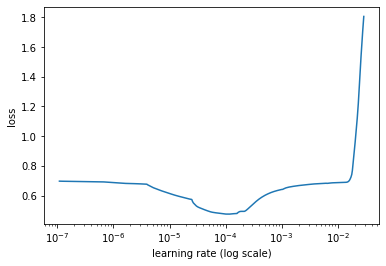



begin training using triangular learning rate policy with max lr of 0.0002...
Epoch 1/10
214/214 [==============================] - 95s 391ms/step - loss: 0.6529 - accuracy: 0.6171 - val_loss: 0.6379 - val_accuracy: 0.6152
Epoch 2/10
214/214 [==============================] - 83s 383ms/step - loss: 0.5012 - accuracy: 0.7617 - val_loss: 0.5450 - val_accuracy: 0.7165
Epoch 3/10
214/214 [==============================] - 83s 383ms/step - loss: 0.4320 - accuracy: 0.8062 - val_loss: 0.5115 - val_accuracy: 0.7530
Epoch 4/10
214/214 [==============================] - 84s 384ms/step - loss: 0.3387 - accuracy: 0.8675 - val_loss: 0.5501 - val_accuracy: 0.7332
Epoch 5/10
214/214 [==============================] - 83s 383ms/step - loss: 0.3264 - accuracy: 0.8749 - val_loss: 0.5707 - val_accuracy: 0.7245
Epoch 6/10
214/214 [==============================] - 83s 383ms/step - loss: 0.2860 - accuracy: 0.8993 - val_loss: 0.6259 - val_accuracy: 0.7189
Epoch 7/10
214/214 [==============================

array([[437, 204],
       [108, 514]])

In [7]:
model=t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=32)

learner.lr_find(show_plot=True,max_epochs=10)
learner.autofit(2e-4,early_stopping=5,epochs=10)
learner.validate(class_names=t.get_classes())

In [8]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

data=test_df[1].tolist()
label=test_df[2].tolist()

i = 0
correct = 0
wrong = 0
total = len(data)
true_lab = []
pred_lab = []
text = []
for dt in data:
    result = predictor.predict(dt)
    if not int(result) == label[i]:
        text.append(dt)
        pred_lab.append(result)
        true_lab.append(label[i])
        wrong += 1
    else:
        correct += 1

    i += 1


In [9]:
name_dict = {
    'Name': text,
    'Gold Label': true_lab,
    'Predicted Label': pred_lab
}

wrong_data = pd.DataFrame(name_dict)

wrong_data.to_csv("wrong_results.csv", sep=';')

print("Correct: ", correct,"/",total,"\nWrong: ", wrong,"/",total)

Correct:  951 / 1263 
Wrong:  312 / 1263
